# 📍 MNIST
'모두를 위한 딥러닝2'의 'Lab06 Softmax Classification'을 듣고 정리한 코드입니다.  

* 강의 링크: https://www.youtube.com/watch?v=pefX1meHOD8&list=PLQ28Nx3M4JrhkqBVIXg-i5_CVVoS1UzAv&index=11
* 블로그 링크: https://gaga.tistory.com/210

## torchvision
torchvision은 유명한 데이터셋, 모델,일반적인 이미지 전처리 도구들을 포함하고 있는 패키지이다.
  
The torchvision package consists of popular datasets, model architectures, and common image transformations for computer vision.  
  
아래의 링크는 torchvision에 어떤 데이터셋들과 모델들, 그리고 어떤 전처리 방법을 제공하고 있는지 보여준다.
  
https://pytorch.org/vision/stable/index.html

In [27]:
import torch
import random

In [28]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

현재 환경에서 GPU 연산이 가능하다면 GPU 연산을 하고, 그렇지 않다면 CPU 연산을 하도록 한다.

In [29]:
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)

다음 기기로 학습합니다: cpu


랜덤 시드를 고정한다.

In [30]:
# for reproducibility
random.seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [31]:
# hyperparameters
training_epochs = 15
batch_size = 100

dsets.MNIST(
* root='데이터를 다운 받을 경로',  
* train=True(훈련 데이터 리턴) or False(테스트 데이터 리턴),  
* transform=transforms.ToTensor(), # 현재 데이터를 파이토치 텐서로 변환  
* download=True # 해당 경로에 MNIST 데이터가 없다면 다운   
  
)

In [41]:
batch_size = 100

mnist_train = dsets.MNIST(root="MNIST_data/", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST(root="MNIST_data/", train=False, transform=transforms.ToTensor(), download=True)

In [42]:
# dataset loader
data_loader = DataLoader(dataset=mnist_train,
                        batch_size=batch_size, # 배치 크기는 100
                        shuffle=True,   # 매 epoch마다 mini batch를 shuffle 할 것인지
                        drop_last=True) # 다른 미니 배치보다 개수가 적은 마지막 batch를 버릴 것인지

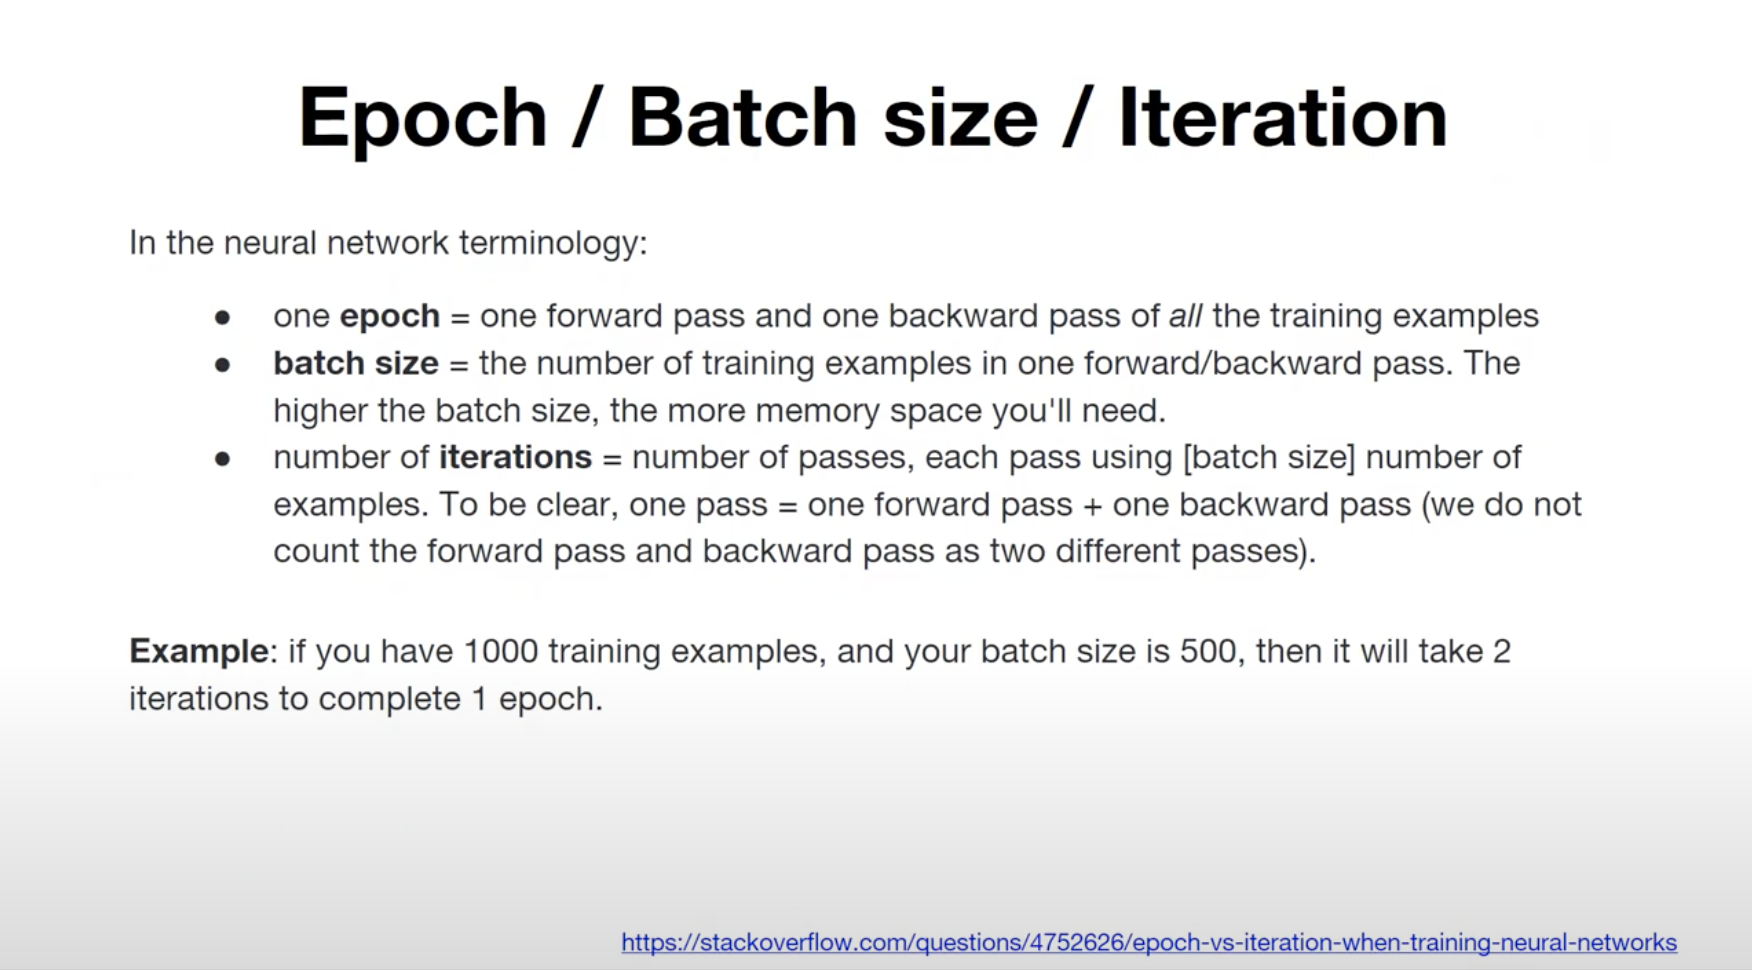

## Softmax

In [43]:
# MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias=True).to(device)

# parameters
training_epochs = 15
batch_size = 100

# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device) # softmax is internally computed.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [44]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    for X, Y in data_loader:
        # reshape input image into [batch size by 784]
        # Label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)
        
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch
        
    print("Epoch: ", "%04d" % (epoch + 1), "cost=", "{:.9f}".format(avg_cost))

Epoch:  0001 cost= 0.537395716
Epoch:  0002 cost= 0.359452575
Epoch:  0003 cost= 0.331301332
Epoch:  0004 cost= 0.316574603
Epoch:  0005 cost= 0.306970358
Epoch:  0006 cost= 0.300190568
Epoch:  0007 cost= 0.294891268
Epoch:  0008 cost= 0.290661901
Epoch:  0009 cost= 0.287513345
Epoch:  0010 cost= 0.284477502
Epoch:  0011 cost= 0.281801045
Epoch:  0012 cost= 0.279668212
Epoch:  0013 cost= 0.277820289
Epoch:  0014 cost= 0.276080757
Epoch:  0015 cost= 0.274472535


### Test

In [46]:
# test the model using test sets
with torch.no_grad(): # gradient를 계산하지 않겠다.
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print("Accuracy: ", accuracy.item())

Accuracy:  0.8877000212669373


## Visualization

In [47]:
import matplotlib.pyplot as plt
import random

Label:  8
Prediction:  3


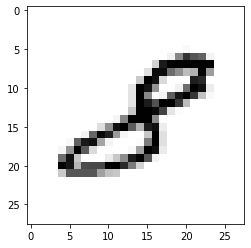

In [48]:
r = random.randint(0, len(mnist_test) - 1)
X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
Y_single_data = mnist_test.test_labels[r:r + 1].to(device)
print("Label: ", Y_single_data.item())
single_prediction = linear(X_single_data)
print("Prediction: ", torch.argmax(single_prediction, 1).item())

plt.imshow(mnist_test.test_data[r:r+1].view(28, 28), cmap='Greys', interpolation='nearest')